In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('Fraud.csv')

In [3]:
# Previewing the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Getting the shape of our dataset
df.shape

(6362620, 11)

In [5]:
# Getting a description of our dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# Checking if null values in the dataset
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Getting the number of fraud and non-fraud transactions
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
# Getting the number of types of transaction
df['type'].value_counts()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

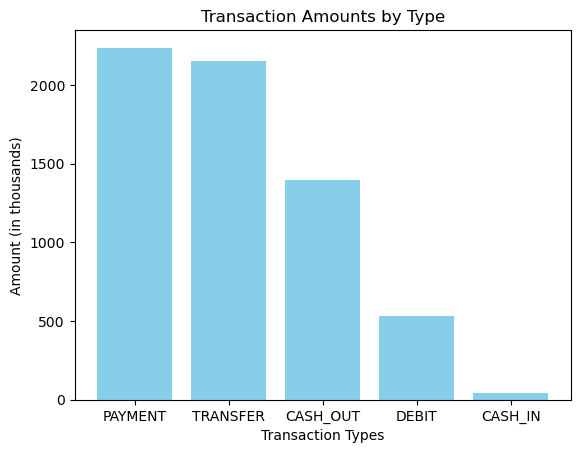

In [16]:
import matplotlib.pyplot as plt
# Plotting the bar chart of types of transactions
plt.bar(df['type'].unique(), (df['type'].value_counts() / 1000), color='skyblue')
# Adding labels and title
plt.xlabel('Transaction Types')
plt.ylabel('Amount (in thousands)')
plt.title('Transaction Amounts by Type')
# Showing the graph
plt.show()

In [23]:
# Importing modules to train our dataset using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [24]:
# Training the dataset using the predefined columns in dataset
X = df.drop(['isFraud', 'nameOrig', 'nameDest', 'type'], axis = 1) # Features
y = df['isFraud'] # Target values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [27]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.86      0.85      0.86      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.93      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270670     234]
 [    235    1385]]


In [28]:
# Visualizing the model
from sklearn.tree import export_text
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_rules)

|--- step <= 718.50
|   |--- amount <= 2554656.50
|   |   |--- amount <= 604933.66
|   |   |   |--- amount <= 0.01
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  0.01
|   |   |   |   |--- step <= 408.50
|   |   |   |   |   |--- isFlaggedFraud <= 0.50
|   |   |   |   |   |   |--- oldbalanceOrg <= 52557.11
|   |   |   |   |   |   |   |--- step <= 6.50
|   |   |   |   |   |   |   |   |--- amount <= 10112.71
|   |   |   |   |   |   |   |   |   |--- amount <= 181.43
|   |   |   |   |   |   |   |   |   |   |--- amount <= 171.63
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- amount >  171.63
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- amount >  181.43
|   |   |   |   |   |   |   |   |   |   |--- oldbalanceDest <= 26157.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- oldbalanceDest >  26157.47
|   |   |   |   |   |   